# Support Vector Machines with Scikit-learn
### One of the most popular and widely used supervised machine learning algorithms.

* SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. 


* It is known for its kernel trick to handle nonlinear input spaces. 


* It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition.


##### The classifier separates data points using a hyperplane with the largest amount of margin. 

##### That's why an SVM classifier is also known as a discriminative classifier. 

##### SVM finds an optimal hyperplane which helps in classifying new data points.



<img src='img/svm1.JPG'>

## Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. 

* It can easily handle multiple continuous and categorical variables. 


* SVM constructs a hyperplane in multidimensional space to separate different classes. 


* SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. 


* The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

### Support Vectors
* Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

### Hyperplane
* A hyperplane is a decision plane which separates between a set of objects having different class memberships.

### Margin
* A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.




## How does SVM work?

#### The main objective is to segregate the given dataset in the best possible way. 

* The distance between the either nearest points is known as the margin. 
* The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. 

### SVM searches for the maximum marginal hyperplane in the following steps:

1. Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.



2. Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.

<img src='img/svm2.JPG'>

# Dealing with non-linear and inseparable planes


Some problems can’t be solved using linear hyperplane, as shown in the figure below (left-hand side).

<br><br>
<img src='img/svm3.JPG'>
* In such situation, SVM uses a **kernel trick** to transform the input space to a higher dimensional space as shown on the right. 


* The data points are plotted on the x-axis and z-axis (Z is the squared sum of both x and y: z=x^2+y^2). 


* Now you can easily segregate these points using linear separation.

# SVM Kernels

The SVM algorithm is implemented in practice using a kernel. 


A kernel transforms an input data space into the required form. 

### Kernel Trick
* SVM uses a technique called the kernel trick. 
    * Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. 

* In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. 

* It is most useful in non-linear separation problem. 

* Kernel trick helps you to build a more accurate classifier.

### Types of Kernels
<br>

* Linear Kernel 
    * A linear kernel can be used as normal dot product any two given observations. 
    * The product between two vectors is the sum of the multiplication of each pair of input values.

<br><br>

* Polynomial Kernel 
    * A polynomial kernel is a more generalized form of the linear kernel. 
    * The polynomial kernel can distinguish curved or nonlinear input space.

<br><br>

* Radial Basis Function Kernel 
    * The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. 
    * RBF can map an input space in infinite dimensional space.

# SVM Classifier Building in Scikit-learn


In the model the building part, you can use the cancer dataset, which is a very famous multi-class classification problem. 

This dataset is computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

The dataset comprises 30 features (mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, and worst fractal dimension) and a target (type of cancer).

This data has two types of cancer classes: malignant (harmful) and benign (not harmful). Here, you can build a model to classify the type of cancer. 

The dataset is available in the scikit-learn library or you can also download it from the UCI Machine Learning Library.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Import Dataset

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [5]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
data['data'].shape

(569, 30)

In [7]:
df = pd.DataFrame(np.c_[data['data'],data['target']],columns=np.append(data['feature_names'],['target']))

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### Visualizing dataset

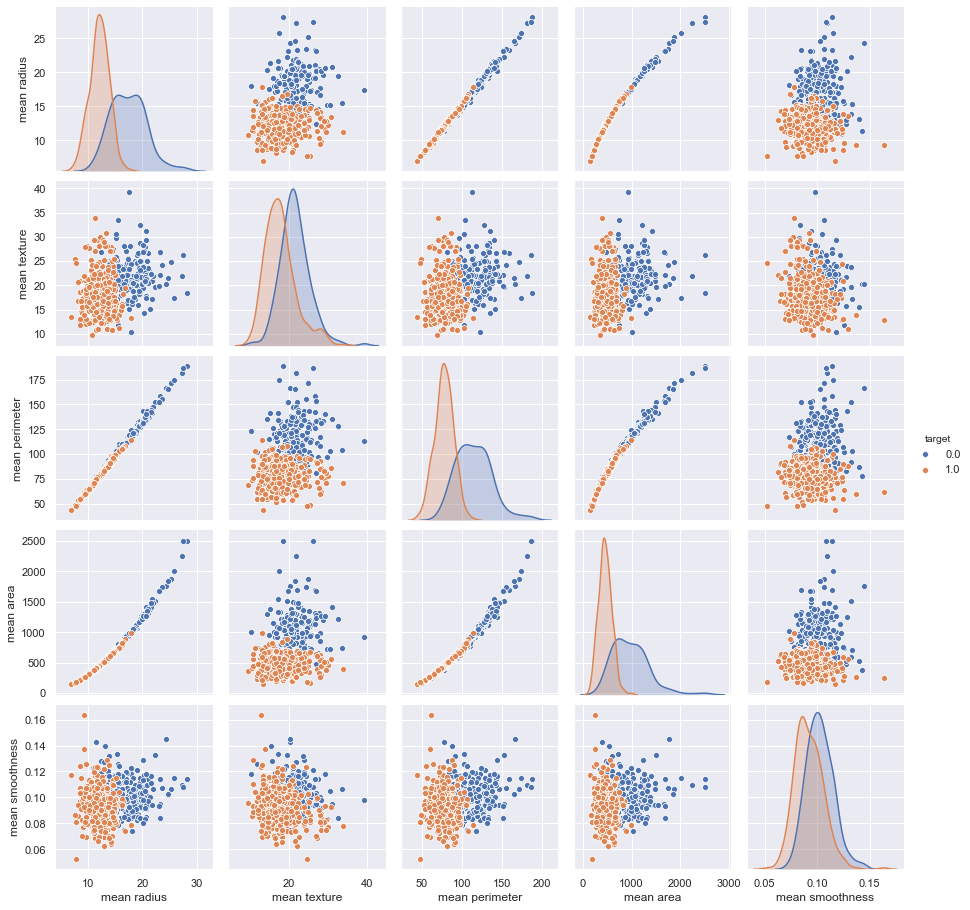

In [11]:
sns.pairplot(df,hue='target',vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness'])

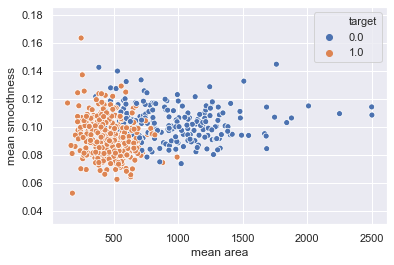

In [10]:
sns.scatterplot(x='mean area',y='mean smoothness',hue='target',data=df)

### Train the model

In [12]:
X = df.drop('target',axis=1)
y = df['target']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.svm import SVC

In [15]:
svc = SVC()
svc.fit(X_train,y_train)

/Users/vipulgaur/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Evaluate the model

In [16]:
y_pred = svc.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print('Test Confusion M \n',confusion_matrix(y_test,y_pred))
print('\nTest Classification Report \n',classification_report(y_test,y_pred))
print('\nAccuracy Score \n',accuracy_score(y_test,y_pred))

Test Confusion M 
 [[ 0 43]
 [ 0 71]]

Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        43
         1.0       0.62      1.00      0.77        71

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114


Accuracy Score 
 0.6228070175438597


/Users/vipulgaur/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
X_train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.117635,19.185033,91.882242,654.377582,0.095744,0.103619,0.088898,0.048280,0.181099,0.062757,...,16.235103,25.535692,107.103121,876.987033,0.131532,0.252742,0.274595,0.114182,0.290502,0.083868
std,3.535815,4.266005,24.322027,354.943187,0.013923,0.052470,0.079468,0.038060,0.027487,0.007210,...,4.811267,6.065108,33.374664,567.672841,0.023083,0.155014,0.209398,0.065326,0.063151,0.017848
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.705000,16.170000,75.100000,420.300000,0.085825,0.062890,0.029320,0.020340,0.161850,0.057645,...,13.055000,21.045000,84.255000,516.450000,0.114400,0.144950,0.116550,0.063930,0.249500,0.071050
50%,13.300000,18.680000,85.980000,551.700000,0.094620,0.090970,0.061540,0.033410,0.179200,0.061480,...,14.970000,25.220000,97.670000,686.600000,0.130900,0.210100,0.226400,0.098610,0.282700,0.080060
75%,15.740000,21.585000,103.750000,767.600000,0.104550,0.131300,0.132350,0.073895,0.195800,0.066100,...,18.410000,29.690000,124.650000,1031.500000,0.146050,0.341600,0.387200,0.161100,0.317750,0.092070
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,1.252000,0.291000,0.663800,0.173000


In [25]:
# X_train_scaled = X_train/X_train.max() - Unit Scaling

# Range Scaling
X_train_scaled = (X_train - X_train.min())/((X_train - X_train.min()).max())

In [26]:
X_train_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.314738,0.320427,0.312720,0.207662,0.389221,0.288471,0.208290,0.239960,0.343826,0.269519,...,0.276190,0.360226,0.267465,0.162115,0.409985,0.247583,0.219325,0.392379,0.264148,0.244387
std,0.173163,0.144268,0.173012,0.152297,0.125693,0.179681,0.186195,0.189166,0.146756,0.151847,...,0.175838,0.161650,0.169664,0.140848,0.156779,0.170231,0.167251,0.224488,0.124485,0.151305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.196582,0.218465,0.193342,0.107226,0.299675,0.148997,0.068697,0.101093,0.241057,0.161858,...,0.159966,0.240538,0.151314,0.072660,0.293622,0.129210,0.093091,0.219691,0.183323,0.135724
50%,0.274695,0.303348,0.270736,0.163606,0.379074,0.245154,0.144189,0.166054,0.333689,0.242628,...,0.229954,0.351812,0.219511,0.114877,0.405692,0.200756,0.180831,0.338866,0.248768,0.212106
75%,0.394192,0.401589,0.397140,0.256243,0.468719,0.383261,0.310098,0.367271,0.422317,0.339933,...,0.355676,0.470949,0.356667,0.200452,0.508592,0.345164,0.309265,0.553608,0.317859,0.313920
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
svc2 = SVC()
svc2.fit(X_train_scaled,y_train)

/Users/vipulgaur/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
#X_test_scaled = X_test/X_test.max()

X_test_scaled = (X_test - X_test.min())/((X_test - X_test.min()).max())

In [29]:
y_pred2 = svc.predict(X_test_scaled)
print('Test Confusion M \n',confusion_matrix(y_test,y_pred2))
print('\nTest Classification Report \n',classification_report(y_test,y_pred2))
print('\nAccuracy Score \n',accuracy_score(y_test,y_pred2))

Test Confusion M 
 [[ 0 43]
 [ 0 71]]

Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        43
         1.0       0.62      1.00      0.77        71

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114


Accuracy Score 
 0.6228070175438597


/Users/vipulgaur/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
